# Mini-Projet MDI 220 Benjamin Cohen

In [1]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt 
import math as mt
from scipy import stats
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import norm 


# Exercice 1 (Exploration des données, recherche de leur loi):

In [21]:
# Question 1

df = pandas.read_csv('https://xyotta.com/v1/images/NuclearPowerAccidents2016.csv' , encoding = "ISO-8859-1")

# Création du vecteur des coûts des accidents avant Three Mile Island :

date = pandas.to_datetime(df['Date'], dayfirst=True , infer_datetime_format=True)
df['Date'] = date

df = df.sort_values(by = 'Date')
df = df.set_index(['Date'])

date_three_miles = '1979-03-27'

data = df.loc[:date_three_miles]
cost = data['Cost (millions 2013US$)']
cost = cost.dropna()

len(cost)

55

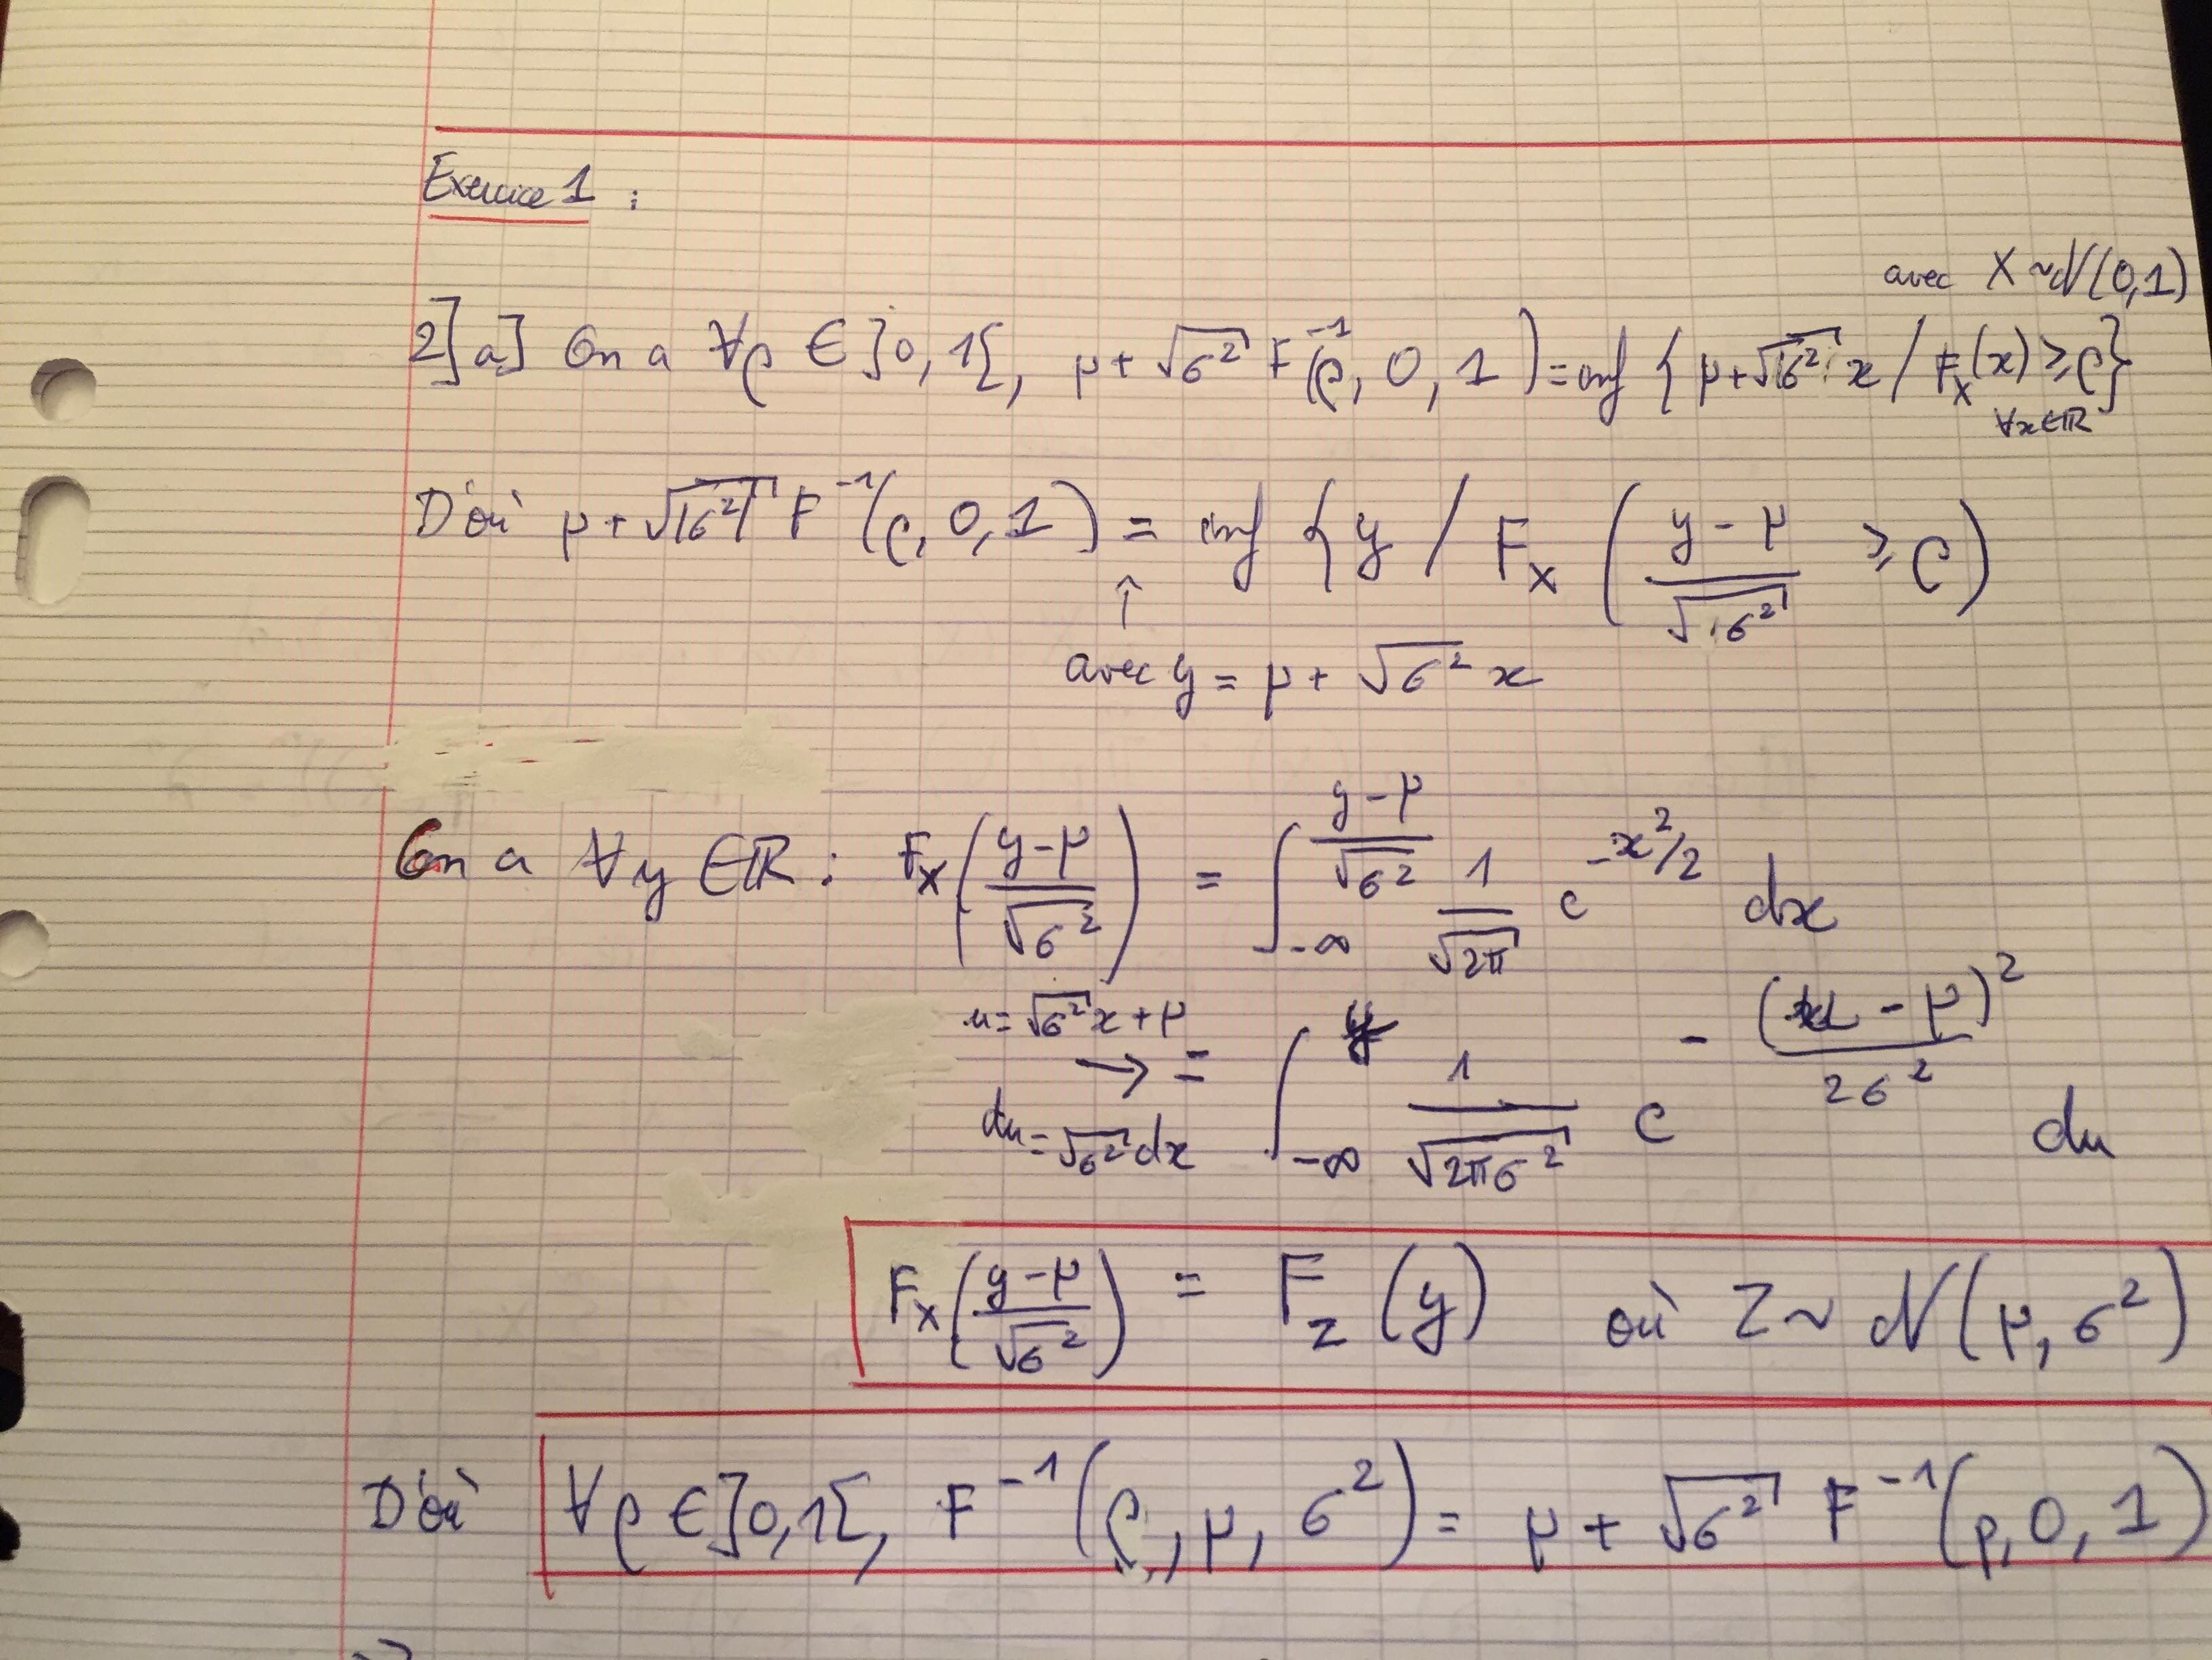

((array([-2.24067415, -1.87510362, -1.66006004, -1.50227431, -1.37493955,
         -1.26666782, -1.17149966, -1.08590302, -1.00760151, -0.93503607,
         -0.86708833, -0.80292598, -0.74191073, -0.68354056, -0.62741195,
         -0.5731943 , -0.52061206, -0.4694319 , -0.41945333, -0.37050163,
         -0.32242247, -0.27507767, -0.22834187, -0.18209983, -0.13624414,
         -0.0906733 , -0.04529008,  0.        ,  0.04529008,  0.0906733 ,
          0.13624414,  0.18209983,  0.22834187,  0.27507767,  0.32242247,
          0.37050163,  0.41945333,  0.4694319 ,  0.52061206,  0.5731943 ,
          0.62741195,  0.68354056,  0.74191073,  0.80292598,  0.86708833,
          0.93503607,  1.00760151,  1.08590302,  1.17149966,  1.26666782,
          1.37493955,  1.50227431,  1.66006004,  1.87510362,  2.24067415]),
  array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+00, 1.2000e+00,
         4.4000e+00, 6.1000e+00, 1.1400e+01, 1

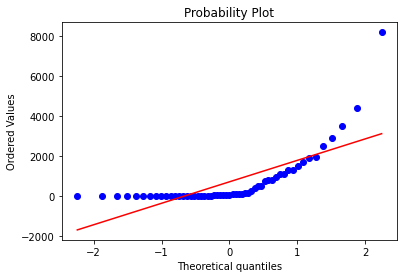

In [3]:
# Question 2.b QQ-plot de données pour la loi normale

res_normal = stats.probplot(cost,dist=norm,plot=plt)
plt.plot()
res_normal

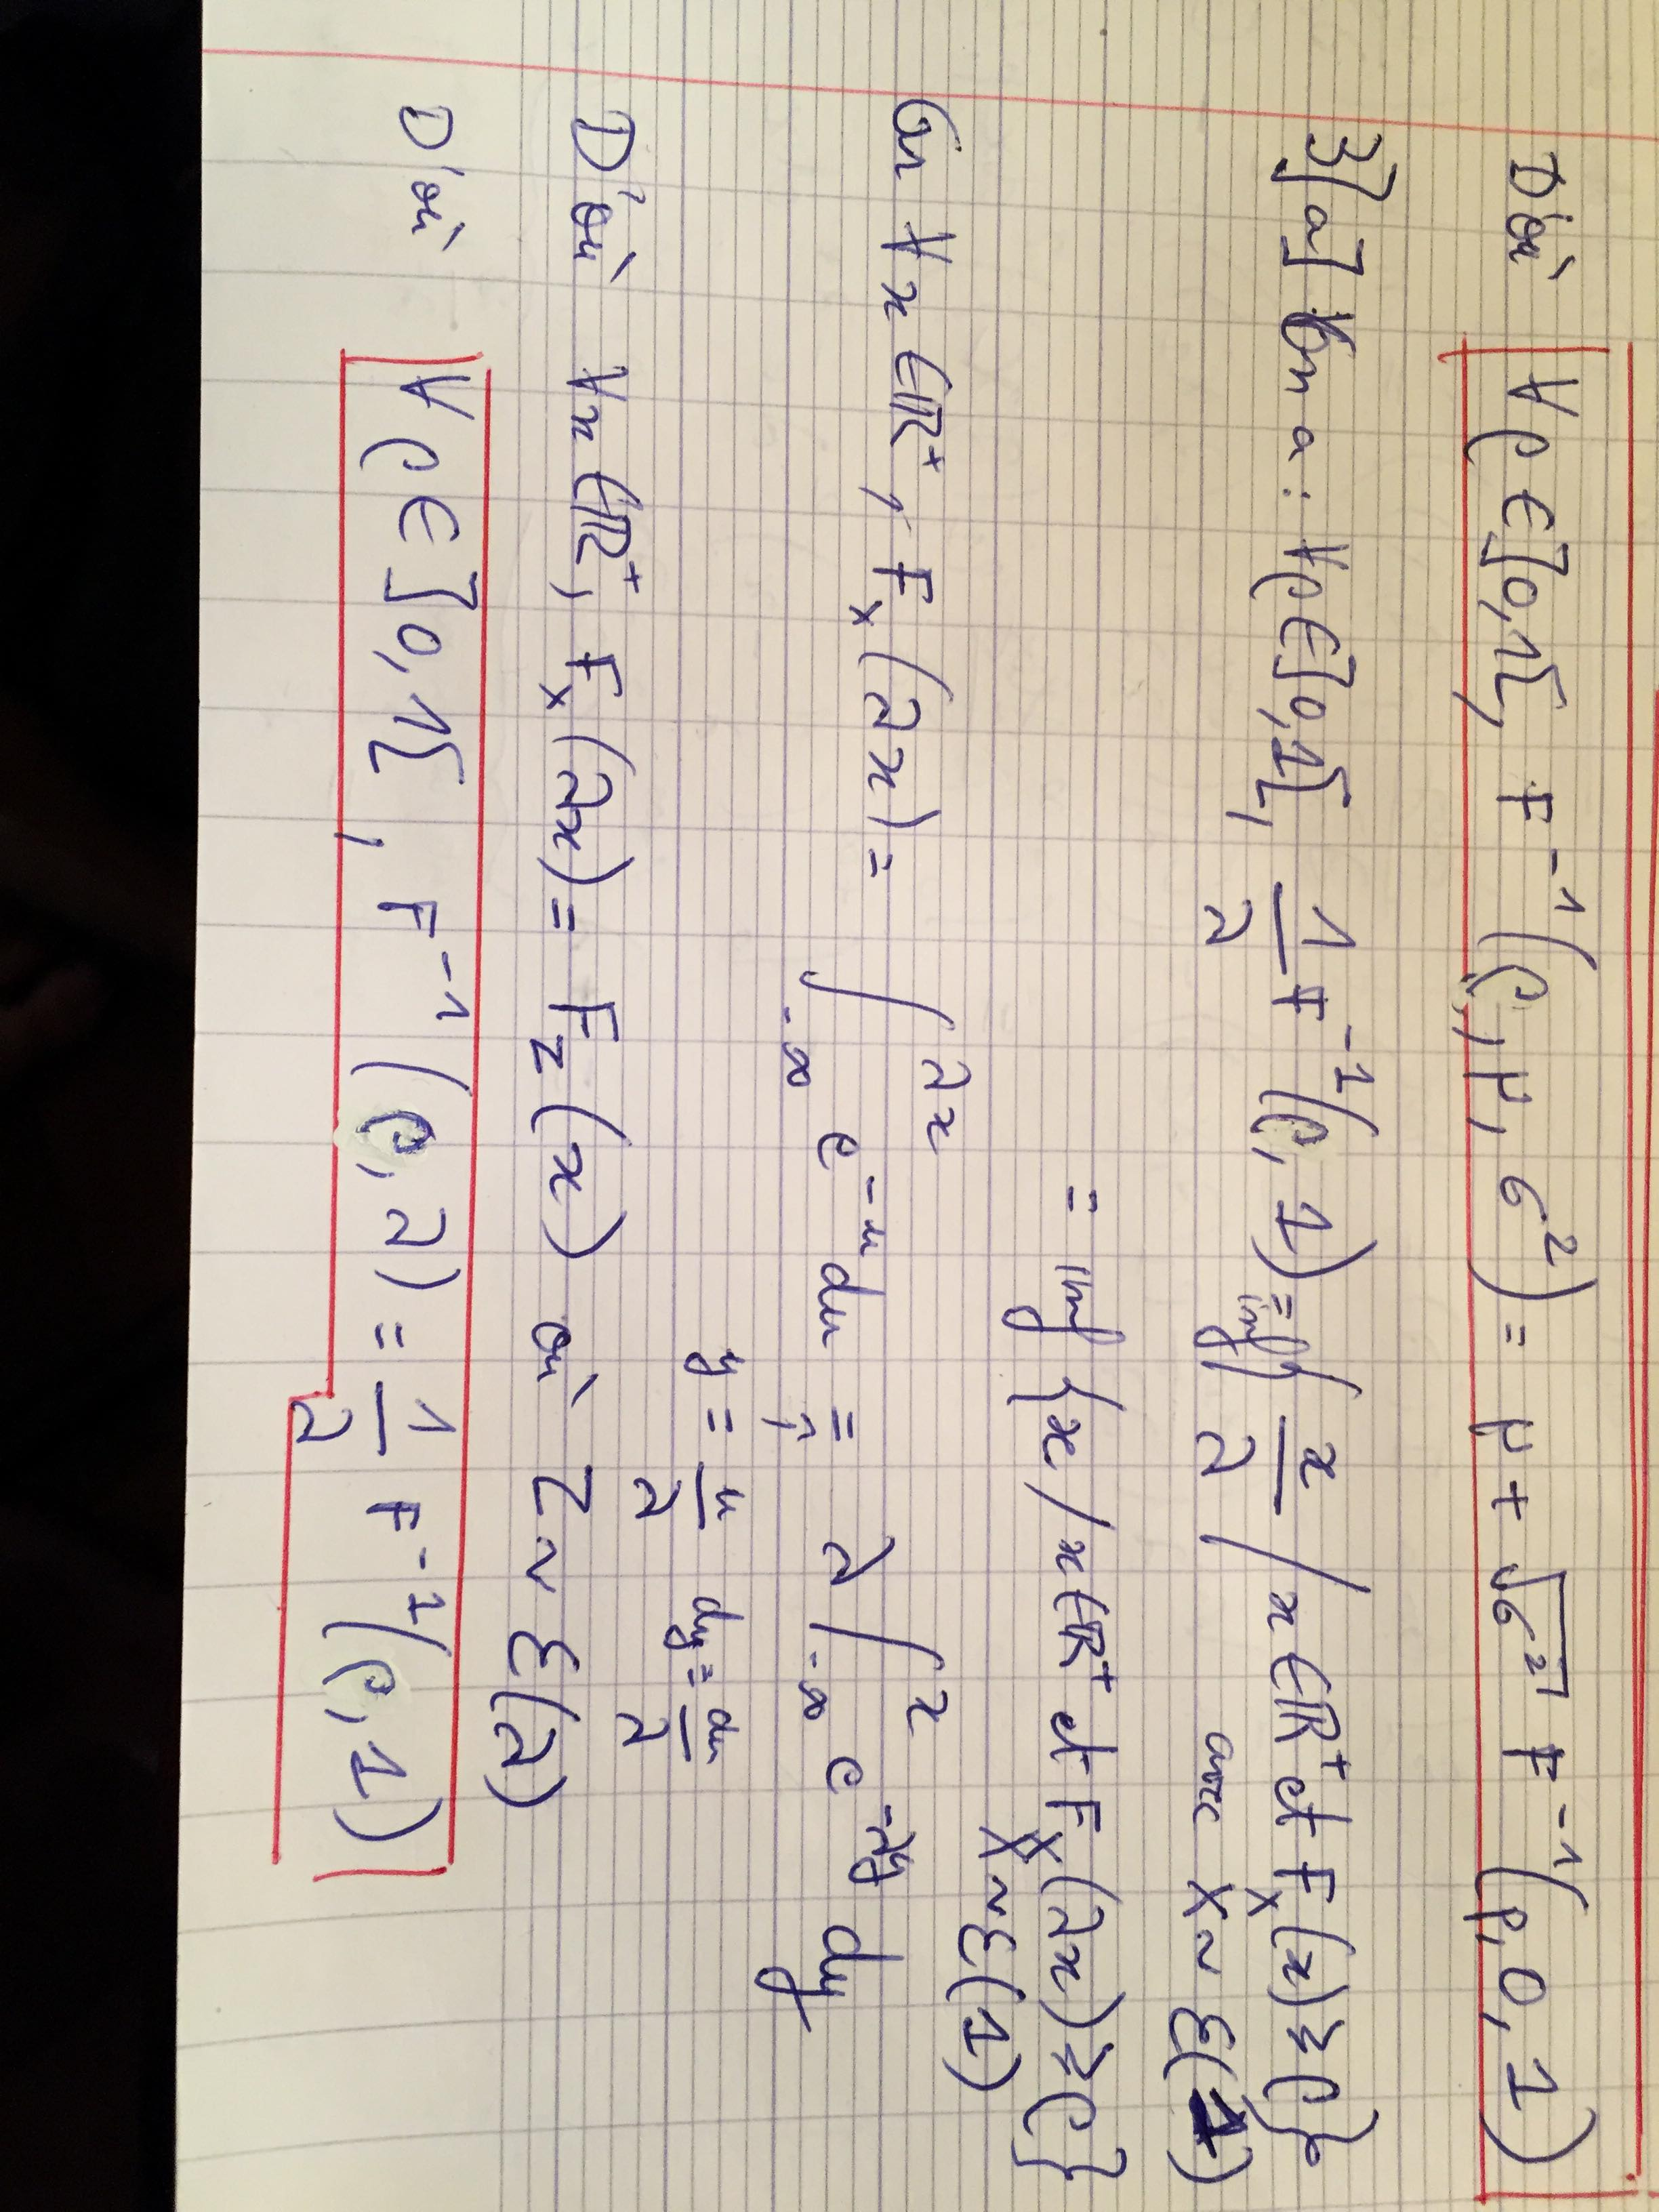

((array([0.01260268, 0.03086056, 0.04966429, 0.06882839, 0.08836694,
         0.10829487, 0.128628  , 0.14938317, 0.17057826, 0.19223233,
         0.2143657 , 0.23700006, 0.26015862, 0.28386625, 0.3081496 ,
         0.33303734, 0.35856032, 0.38475183, 0.41164782, 0.43928725,
         0.46771239, 0.49696921, 0.52710786, 0.55818315, 0.59025517,
         0.62338998, 0.65766044, 0.69314718, 0.72993971, 0.7681378 ,
         0.80785313, 0.84921125, 0.89235392, 0.93744214, 0.98465969,
         1.03421771, 1.08636037, 1.14137218, 1.19958736, 1.26140218,
         1.32729132, 1.39782998, 1.47372453, 1.55585563, 1.64534074,
         1.74362749, 1.85263812, 1.97500261, 2.11445546, 2.27655635,
         2.47011547, 2.71035576, 3.02719843, 3.49366684, 4.38014083]),
  array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+00, 1.2000e+00,
         4.4000e+00, 6.1000e+00, 1.1400e+01, 1.1800e+01, 1.3900e+01,
         1.5000e+01, 1.6100e+01,

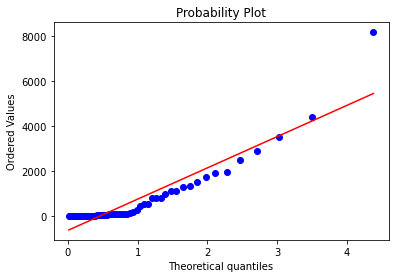

In [4]:
# Question 3.b QQ-plot de données pour la loi exponentielle

res_exp = stats.probplot(cost,dist = expon,plot = plt)
plt.plot()
res_exp

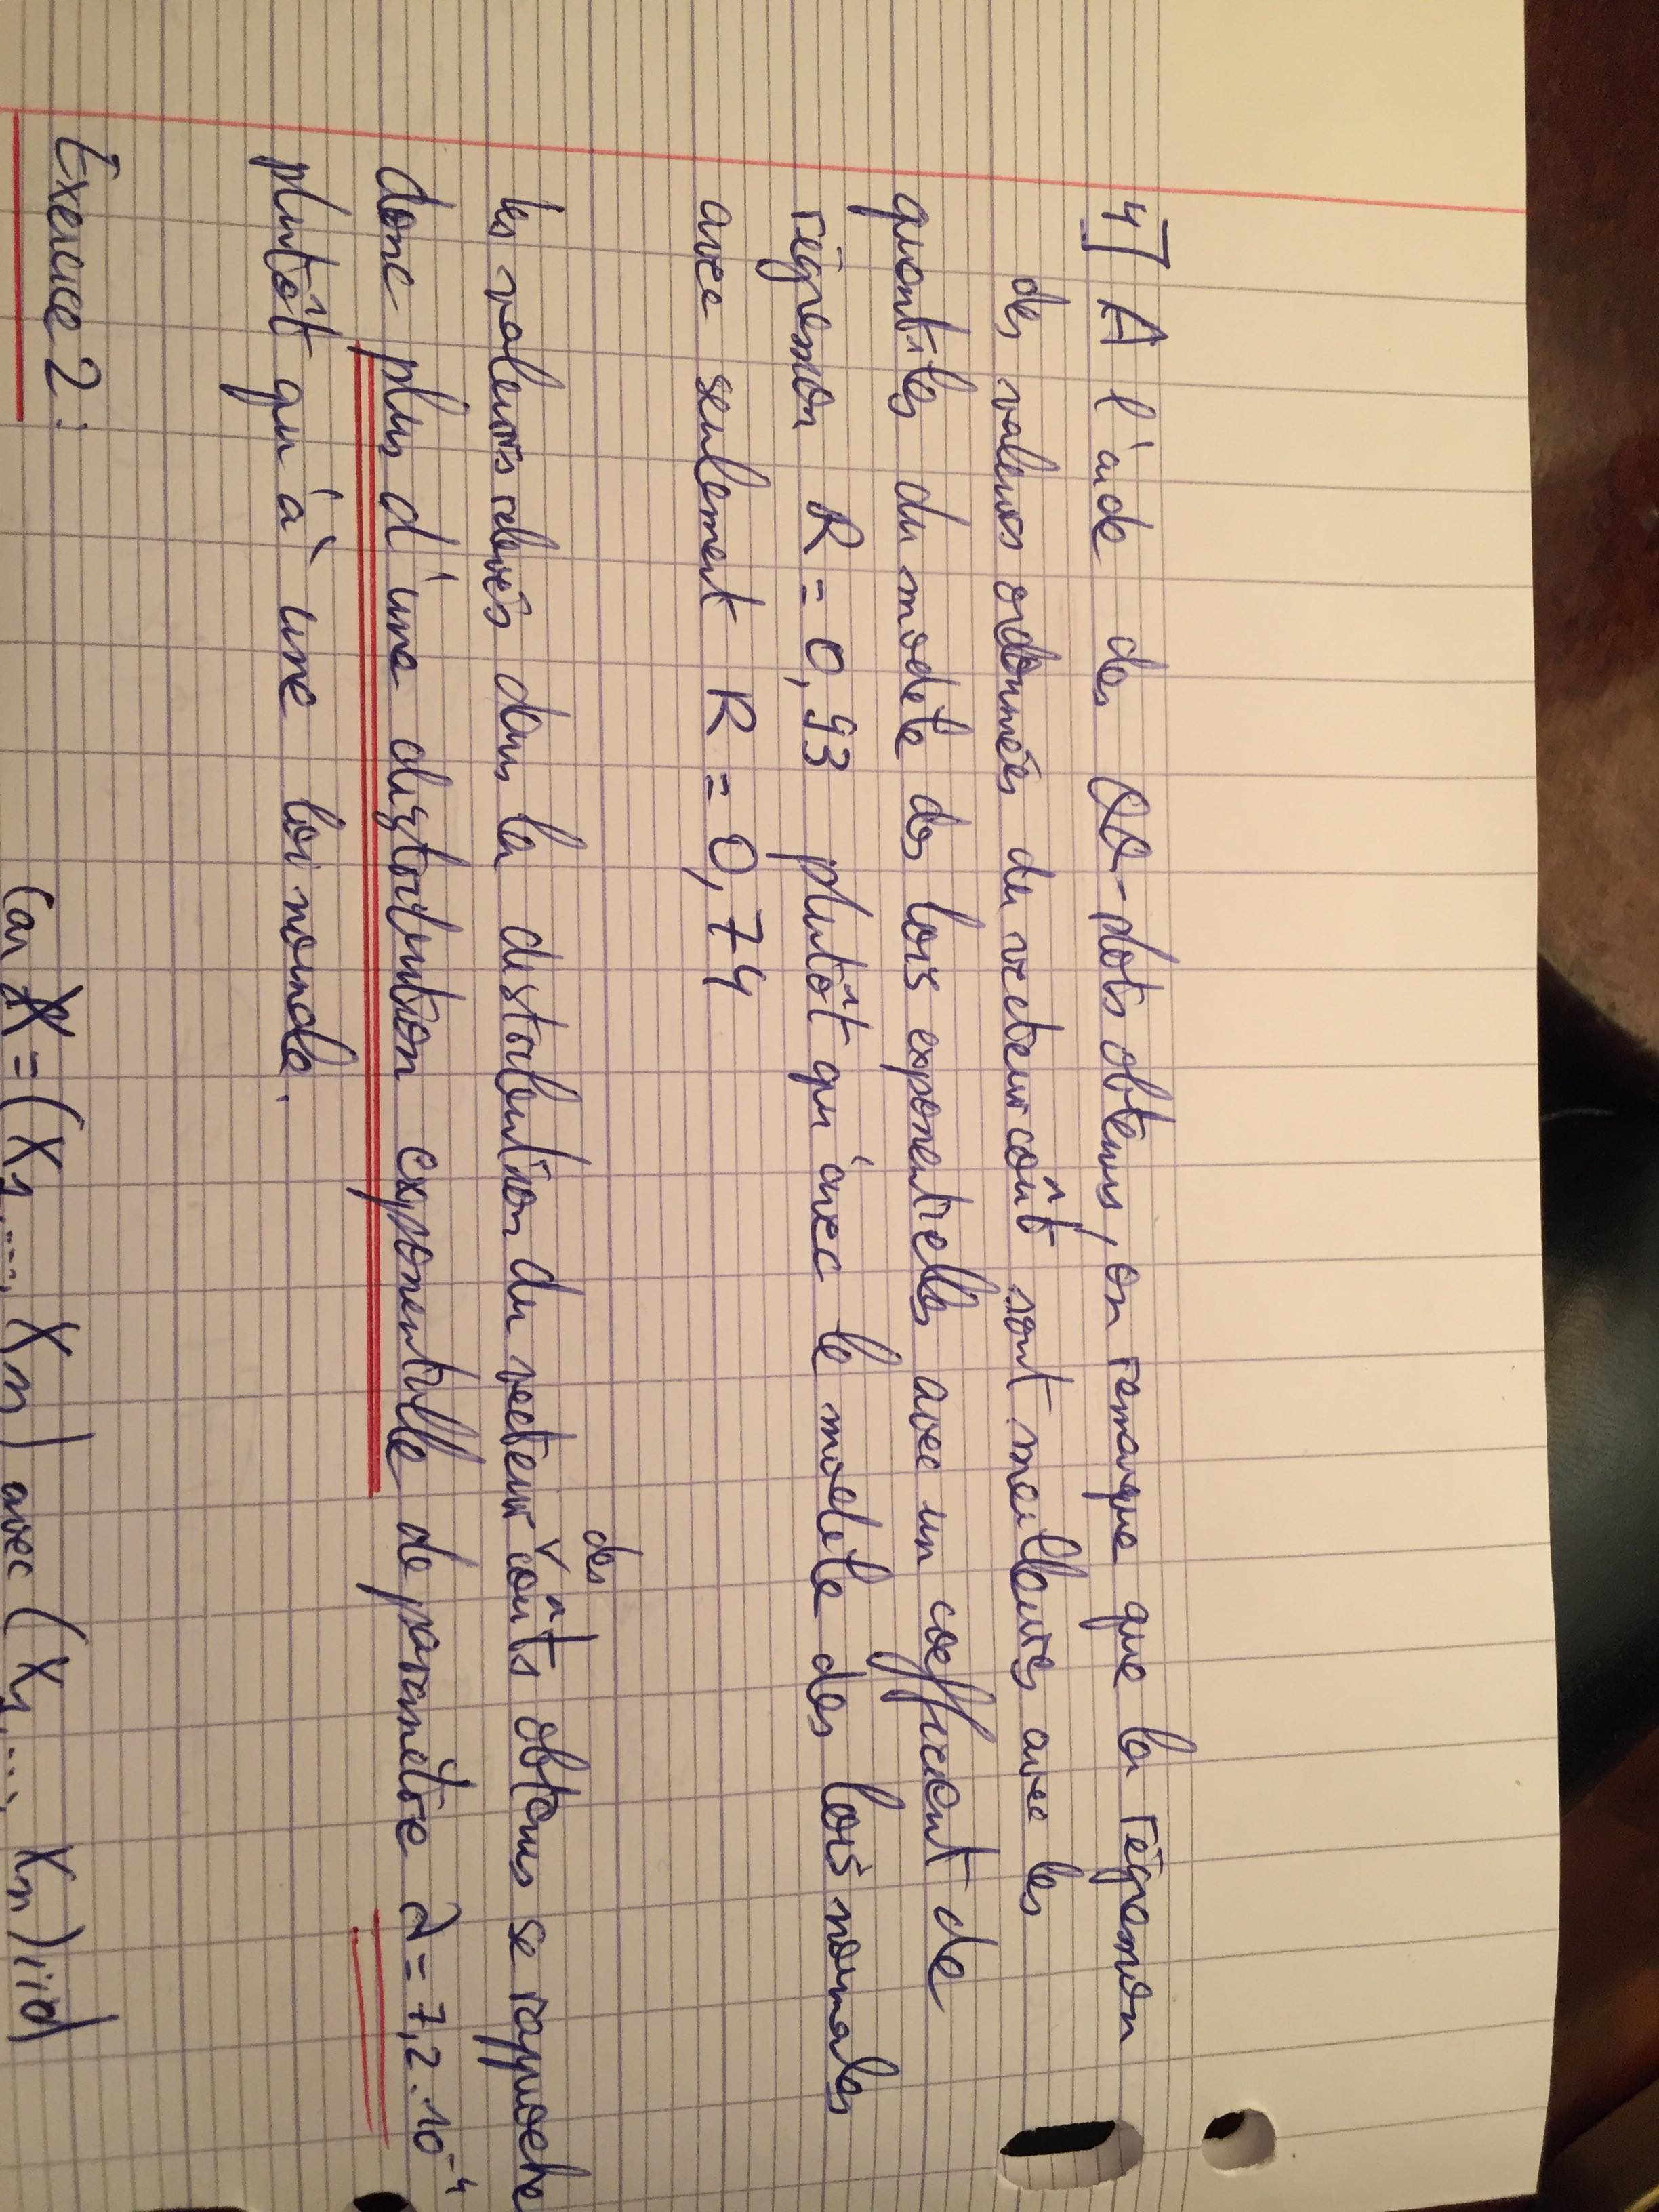

# Exercice 2 (Estimation ponctuelle des paramètres d’une loi exponentielle):

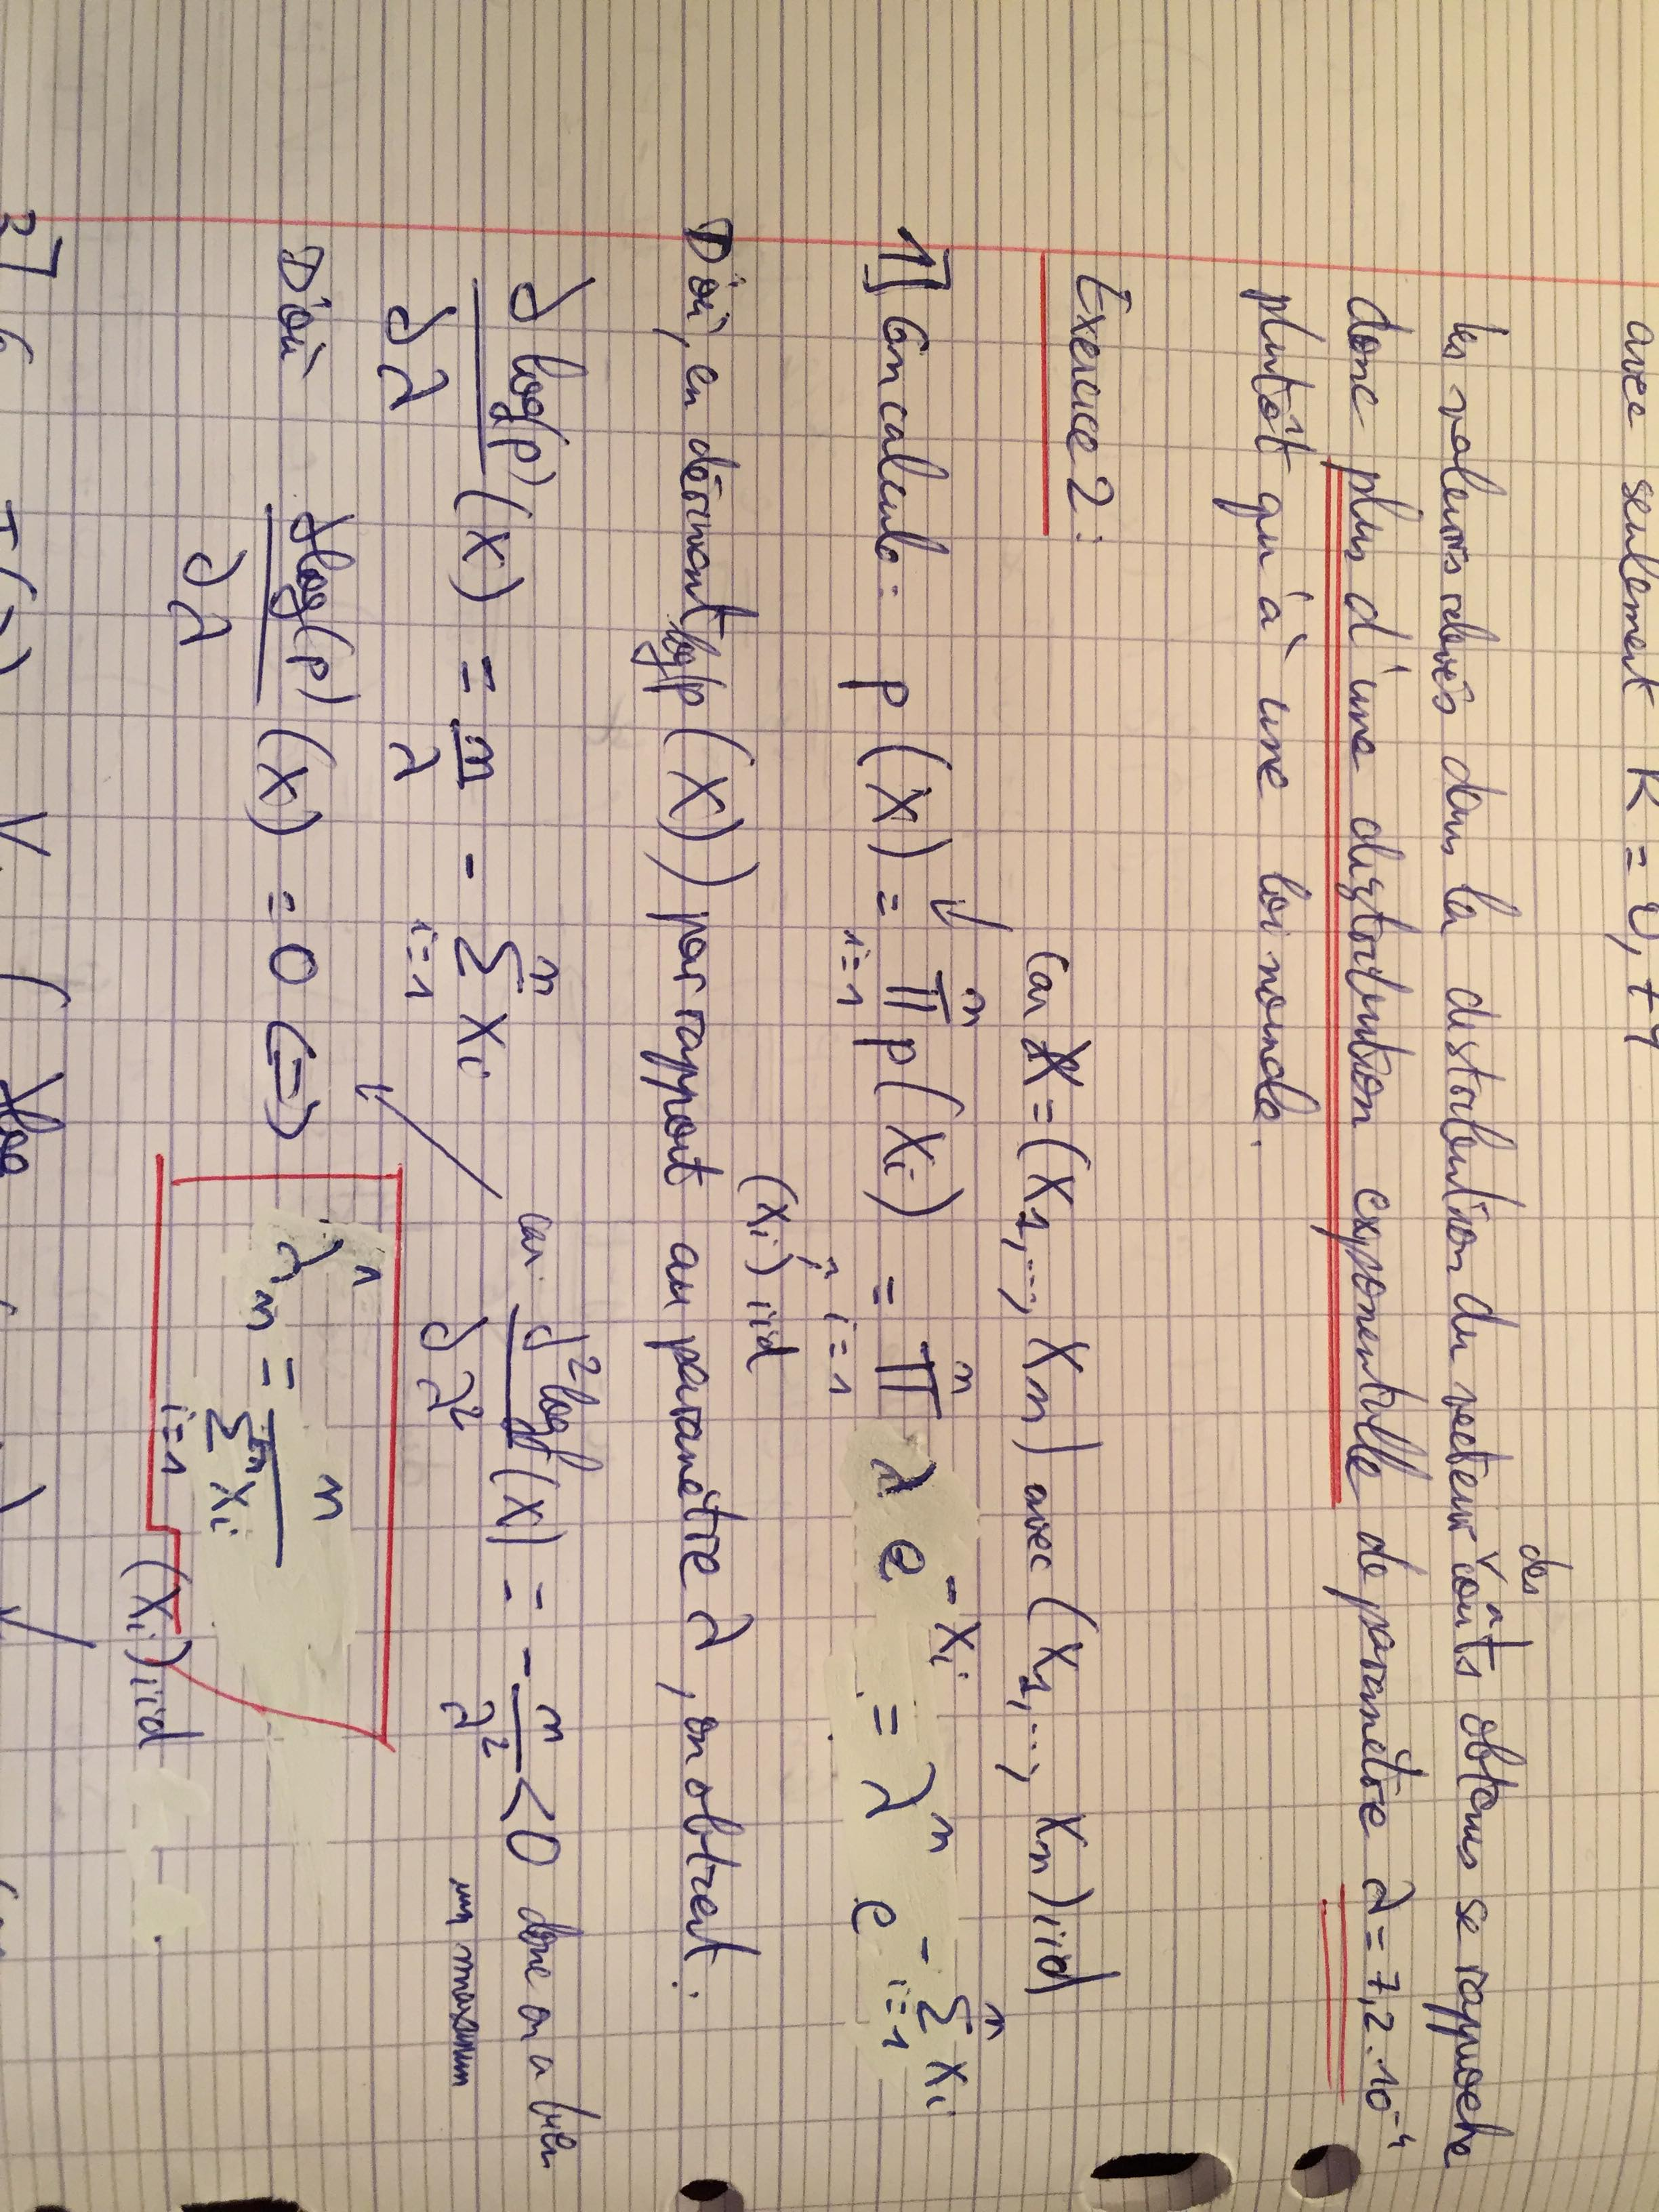

[]

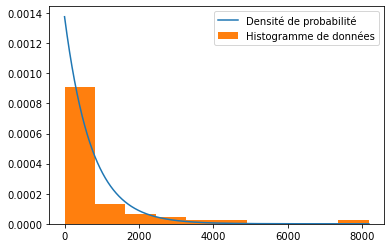

In [5]:
# Question 2

sum = cost.sum()
maximum_likelyhood = len(cost)/sum_x
x = np.arange(0, cost.max())

# Tracer
figure , axis = plt.subplots(1, 1)
axis.plot(x , expon.pdf(x , scale = 1/maximum_likelyhood) , label = "Densité de probabilité")
axis.hist(cost , density = True , label = "Histogramme de données")
axis.legend()

plt.plot()

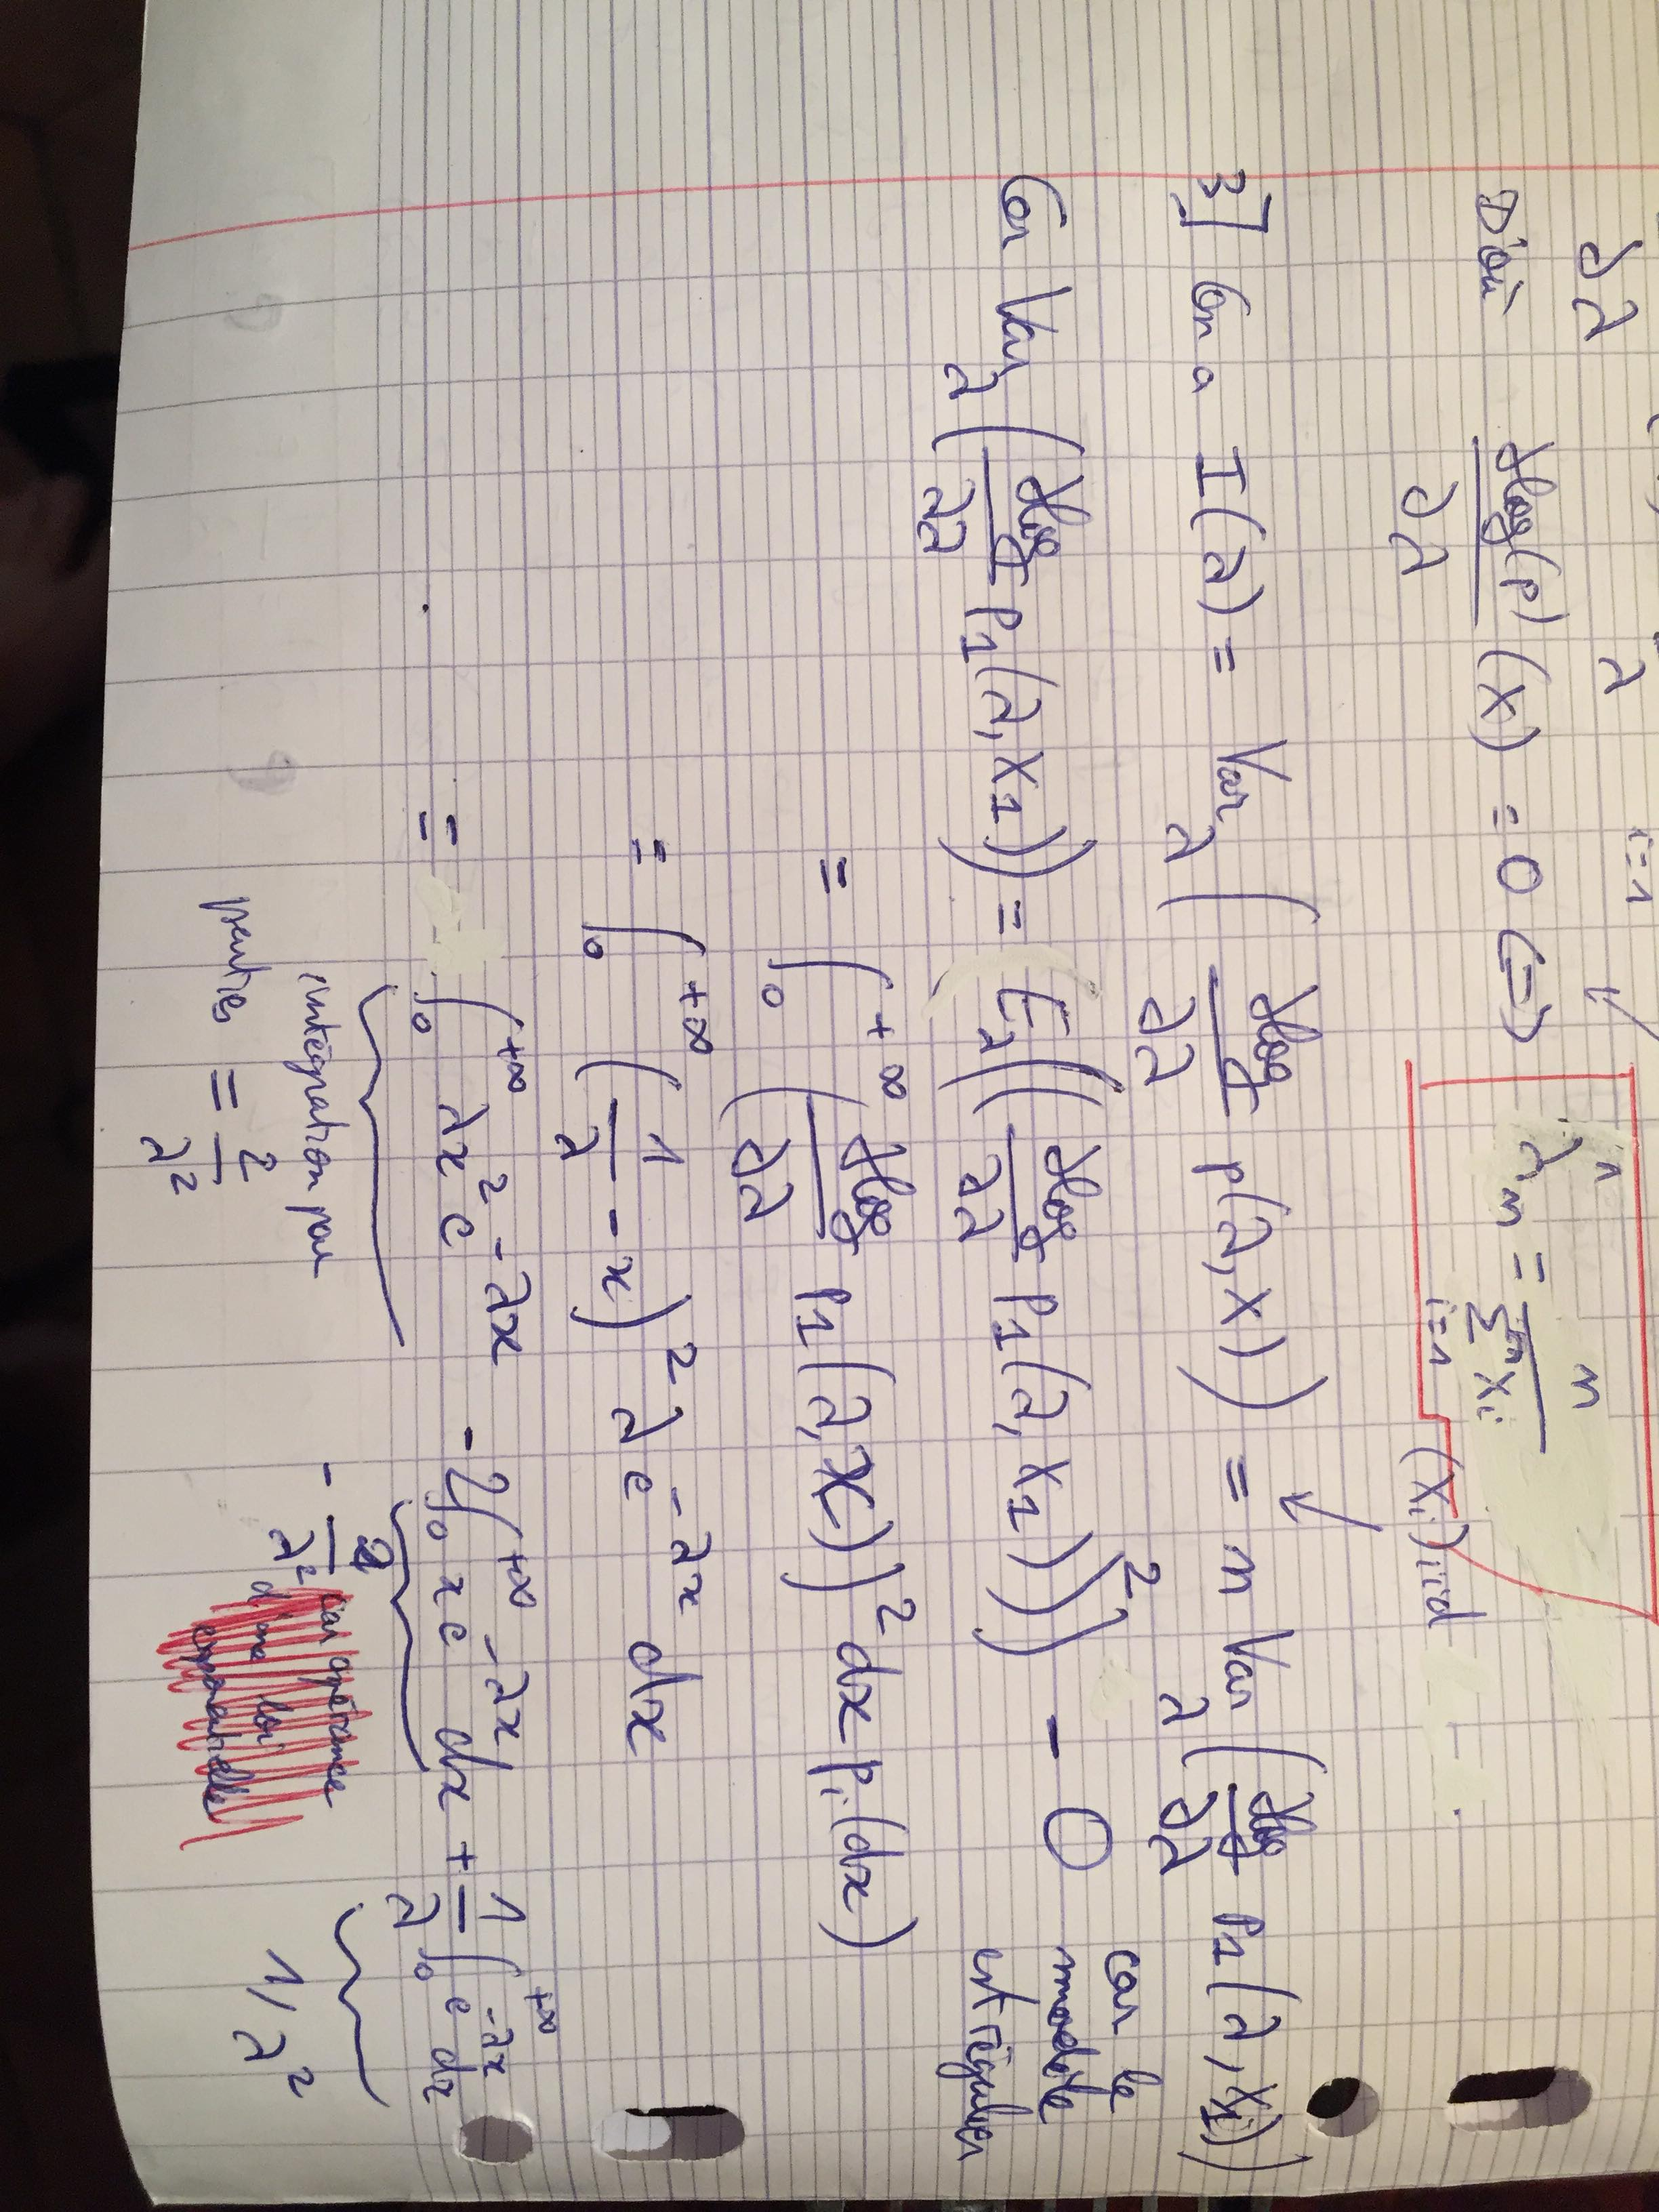
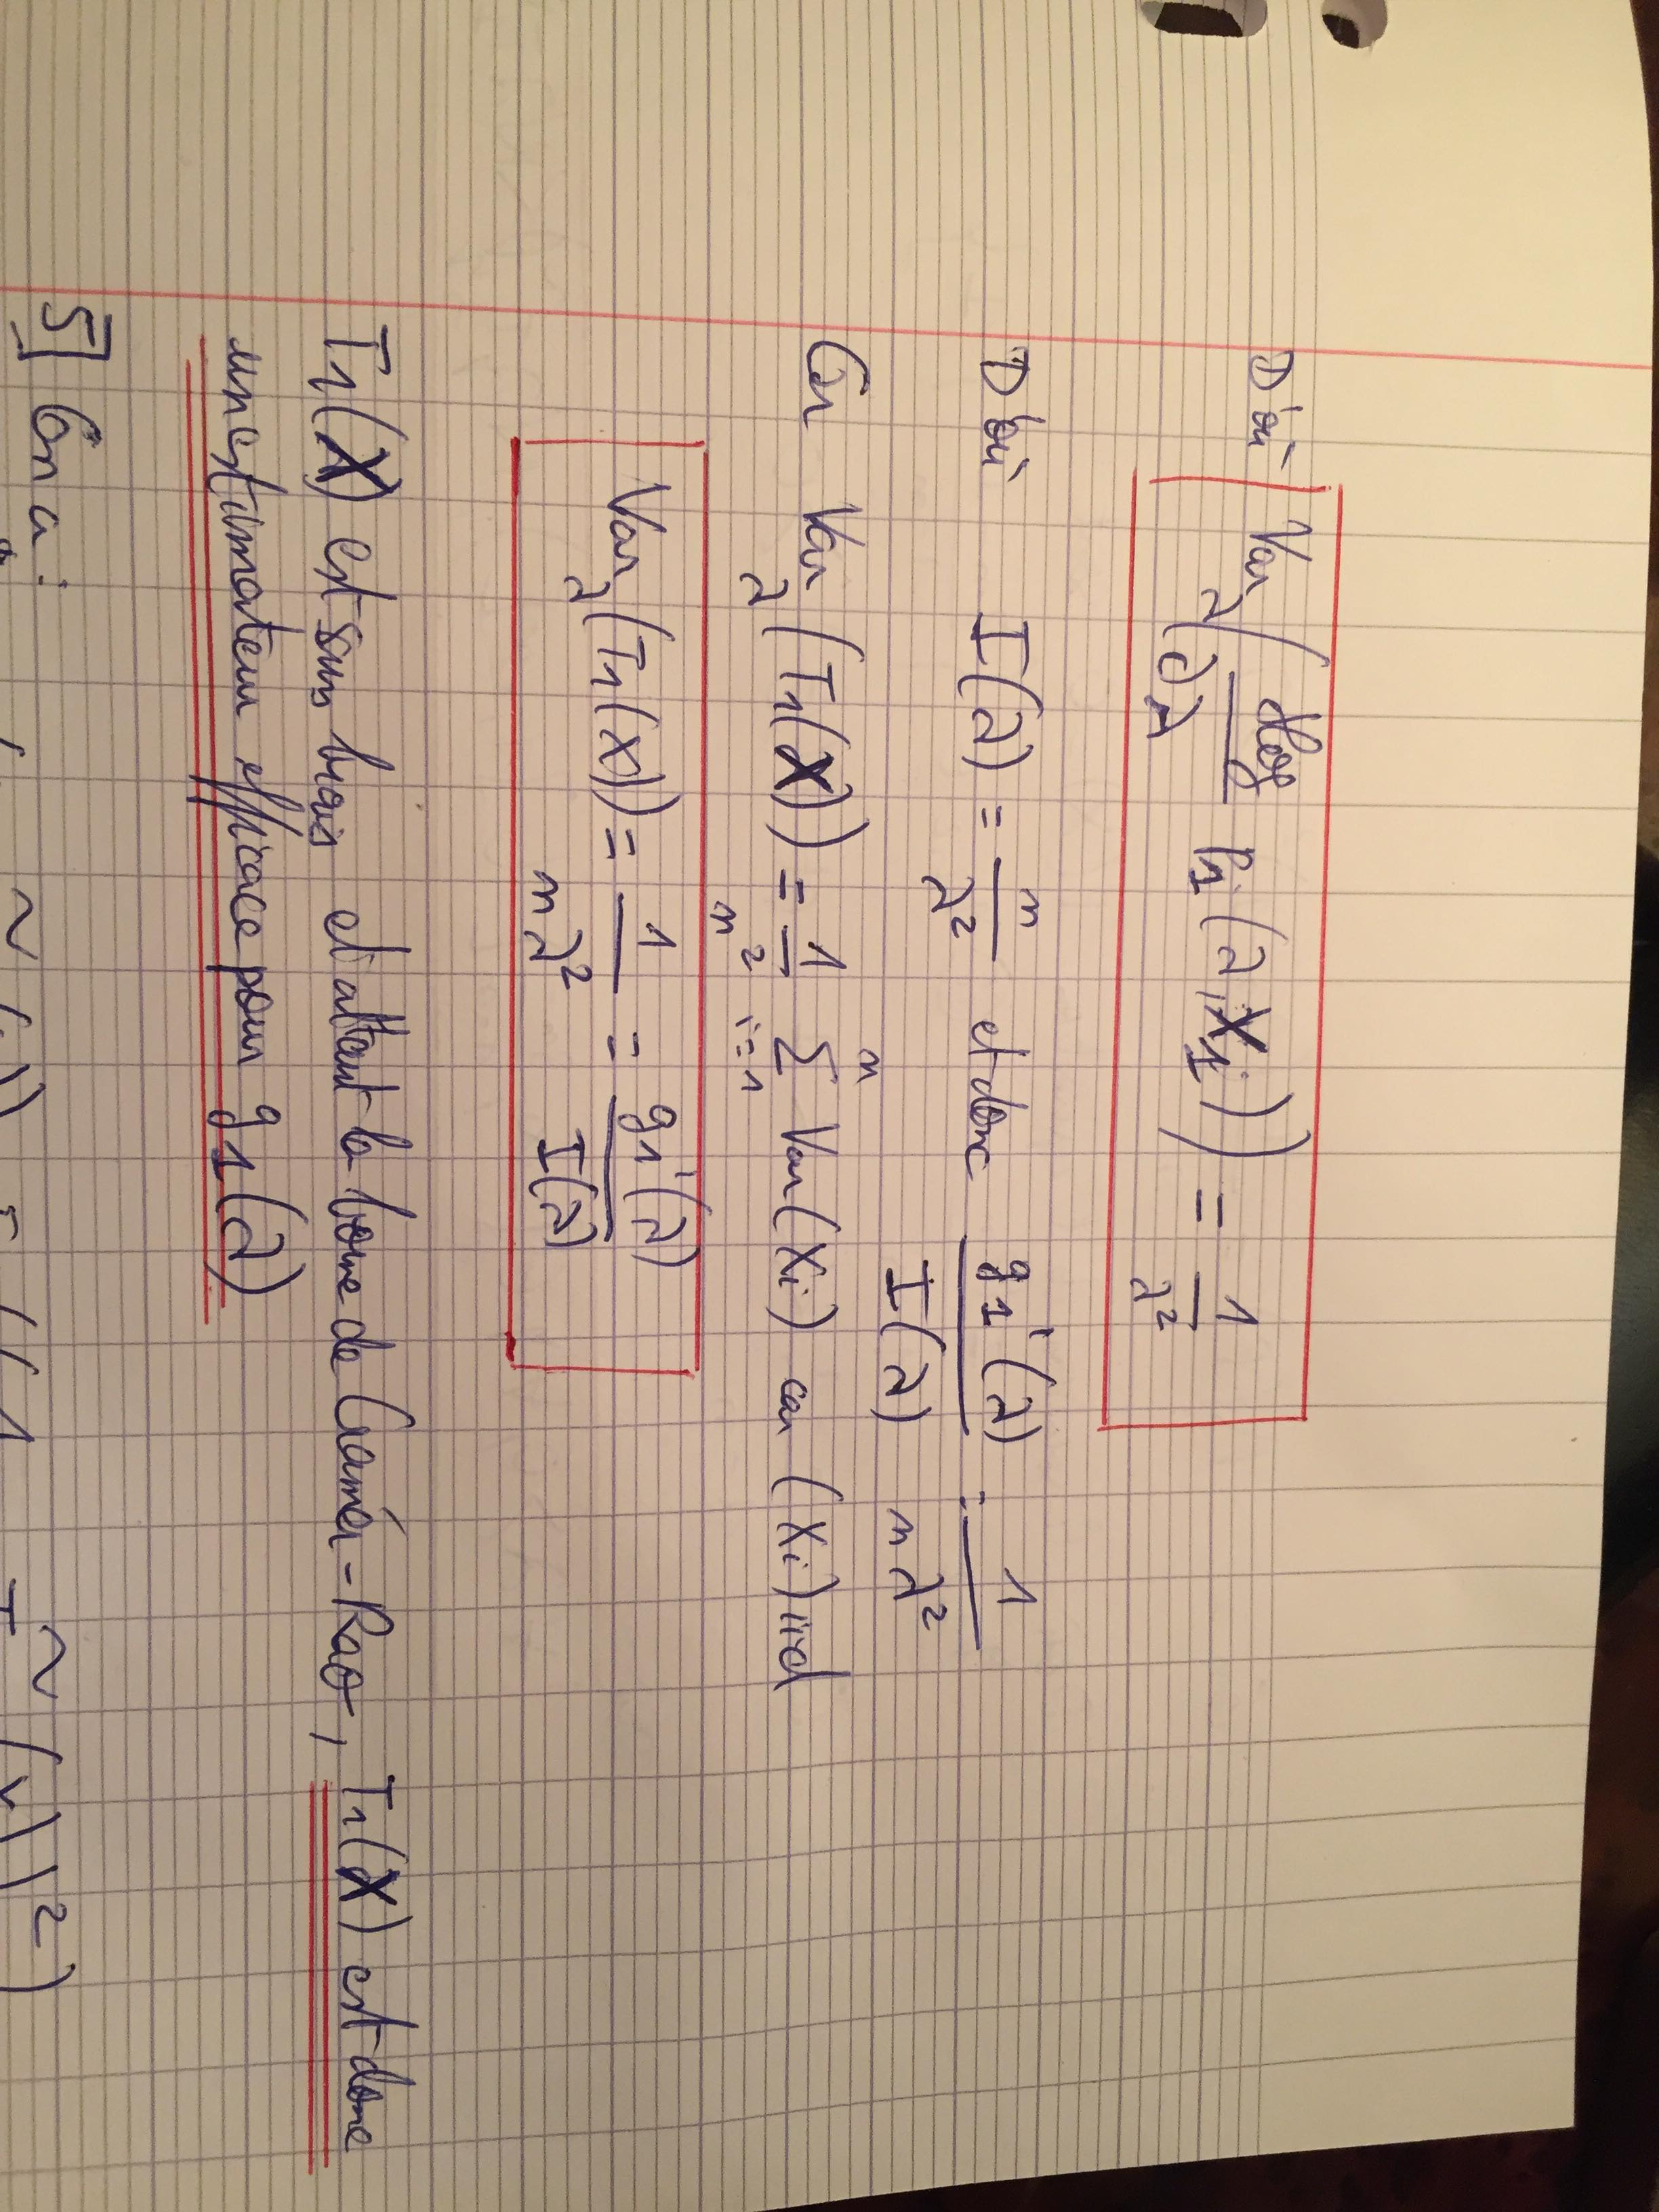

In [85]:
#Question 4 : Calcul de g1(λ)

sum = cost.sum()
g1 = sum/len(cost)

print(g1)

726.3363636363637


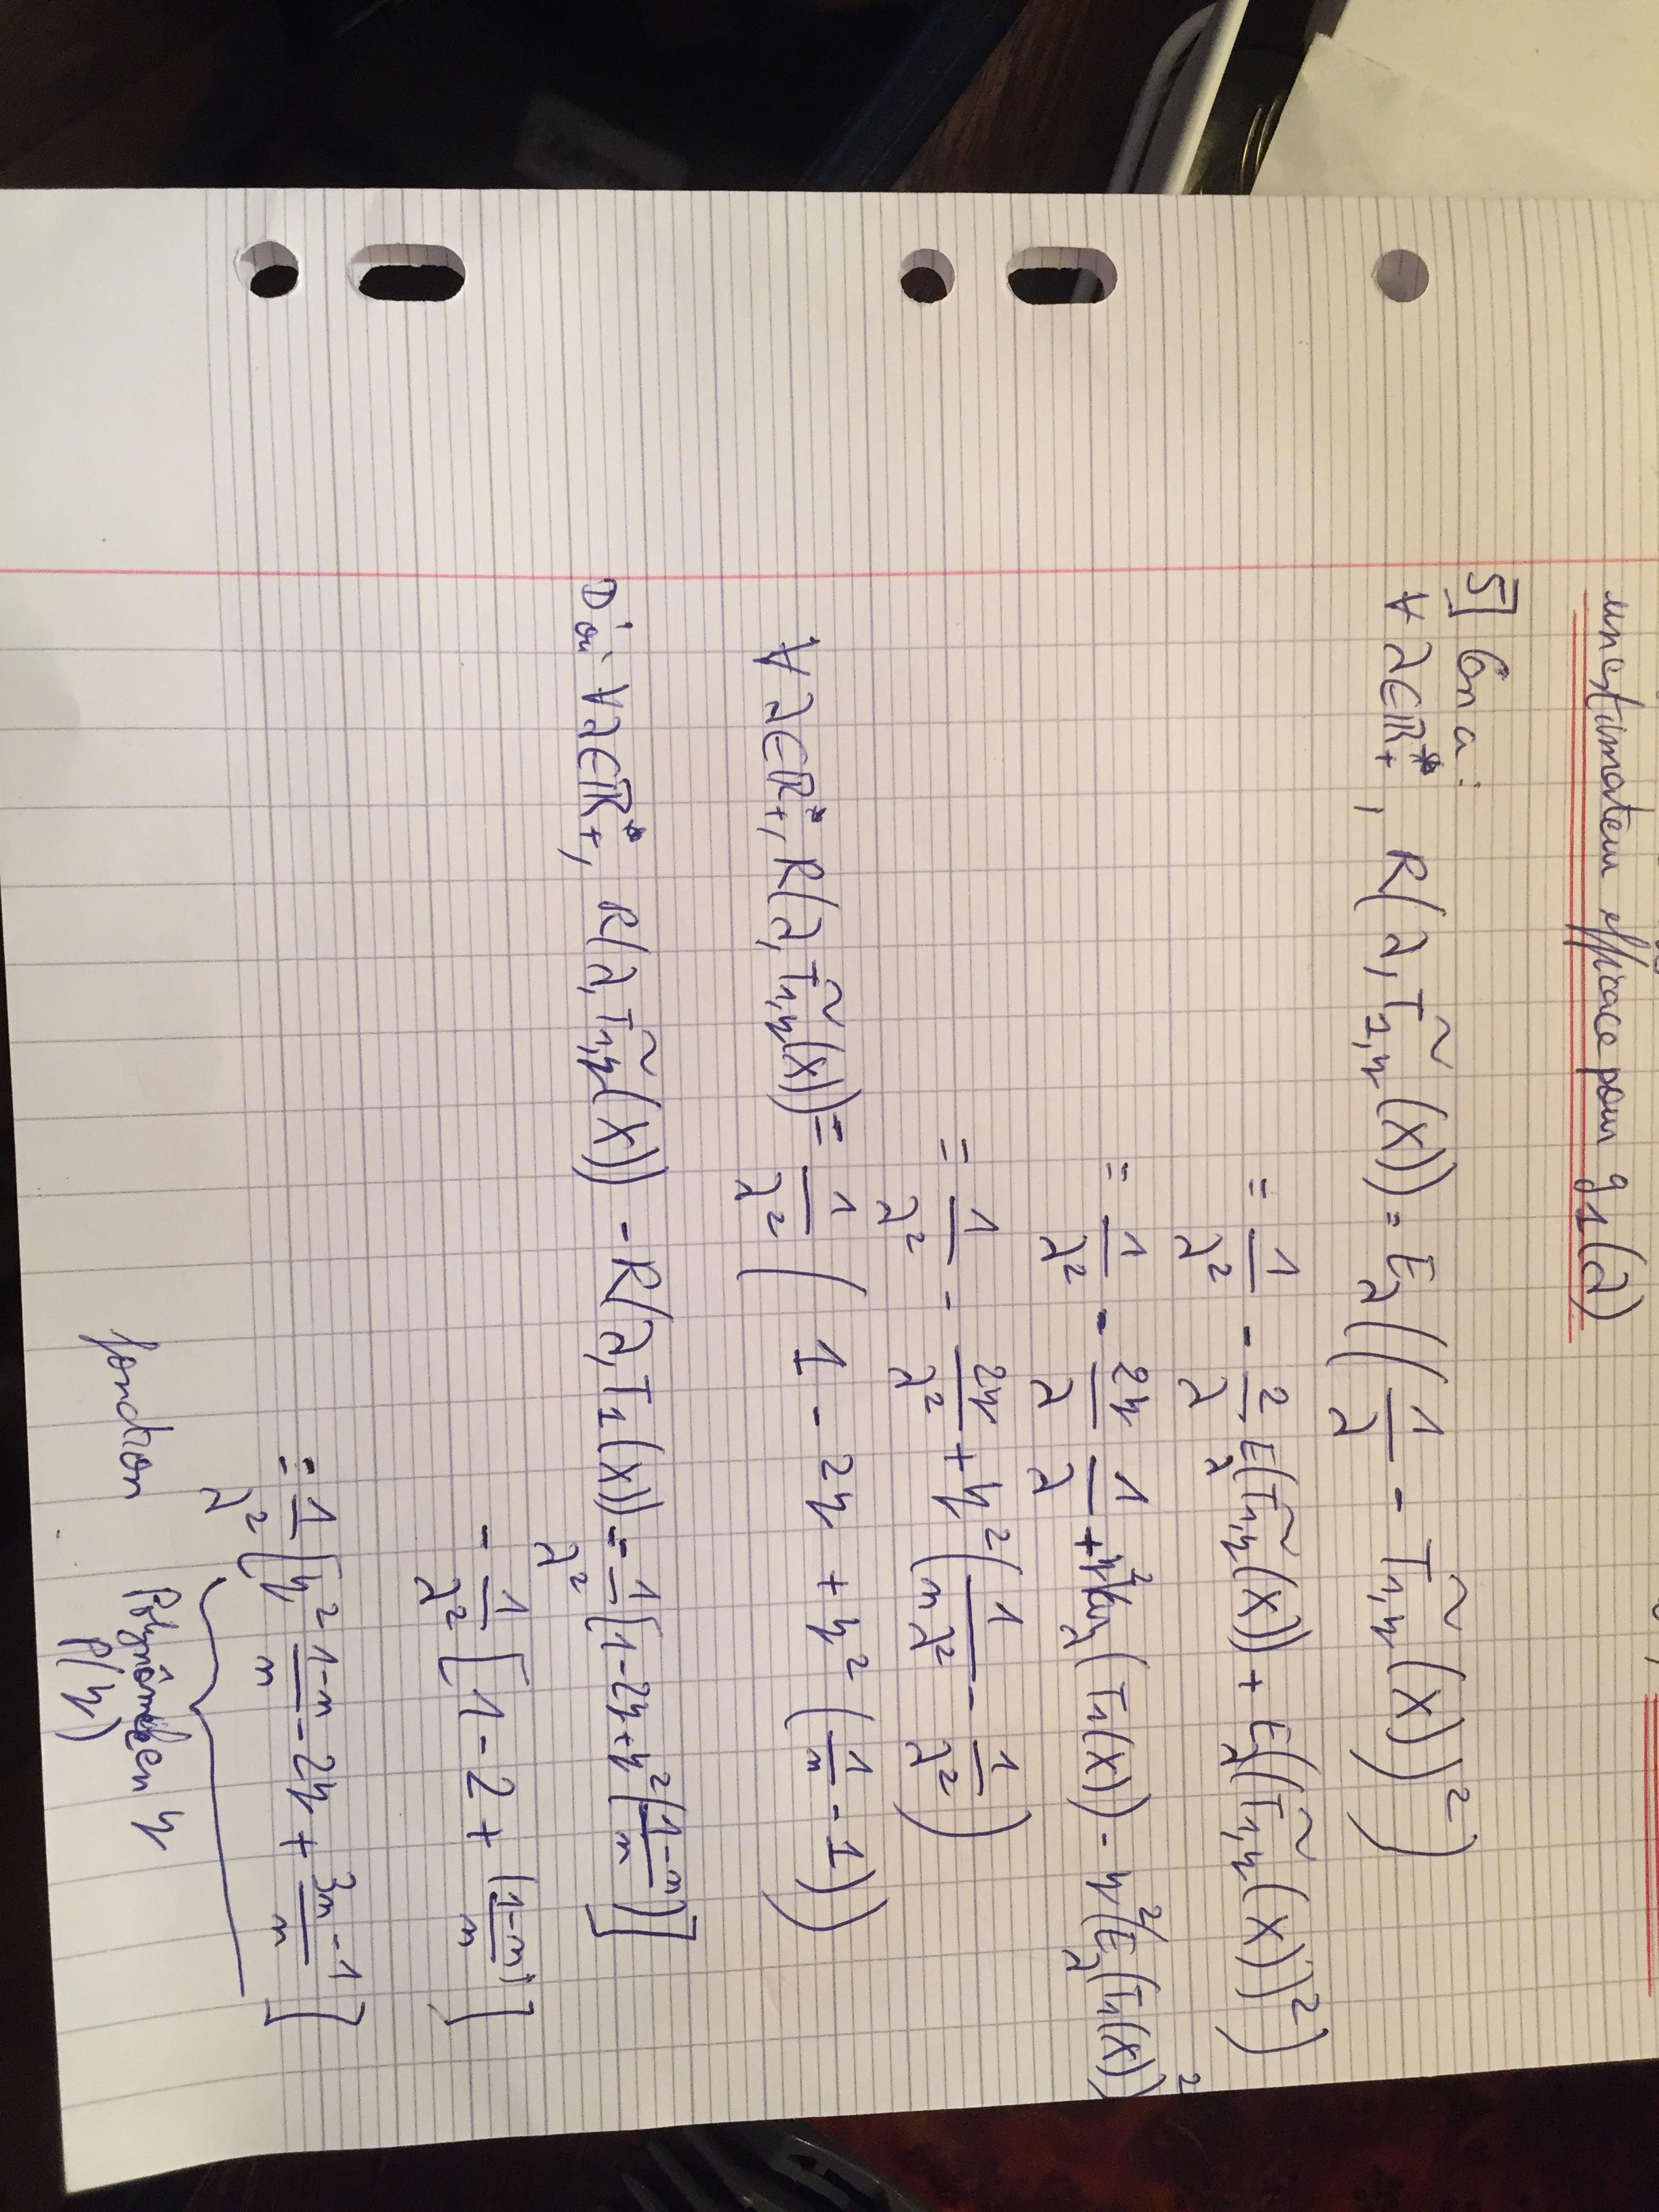
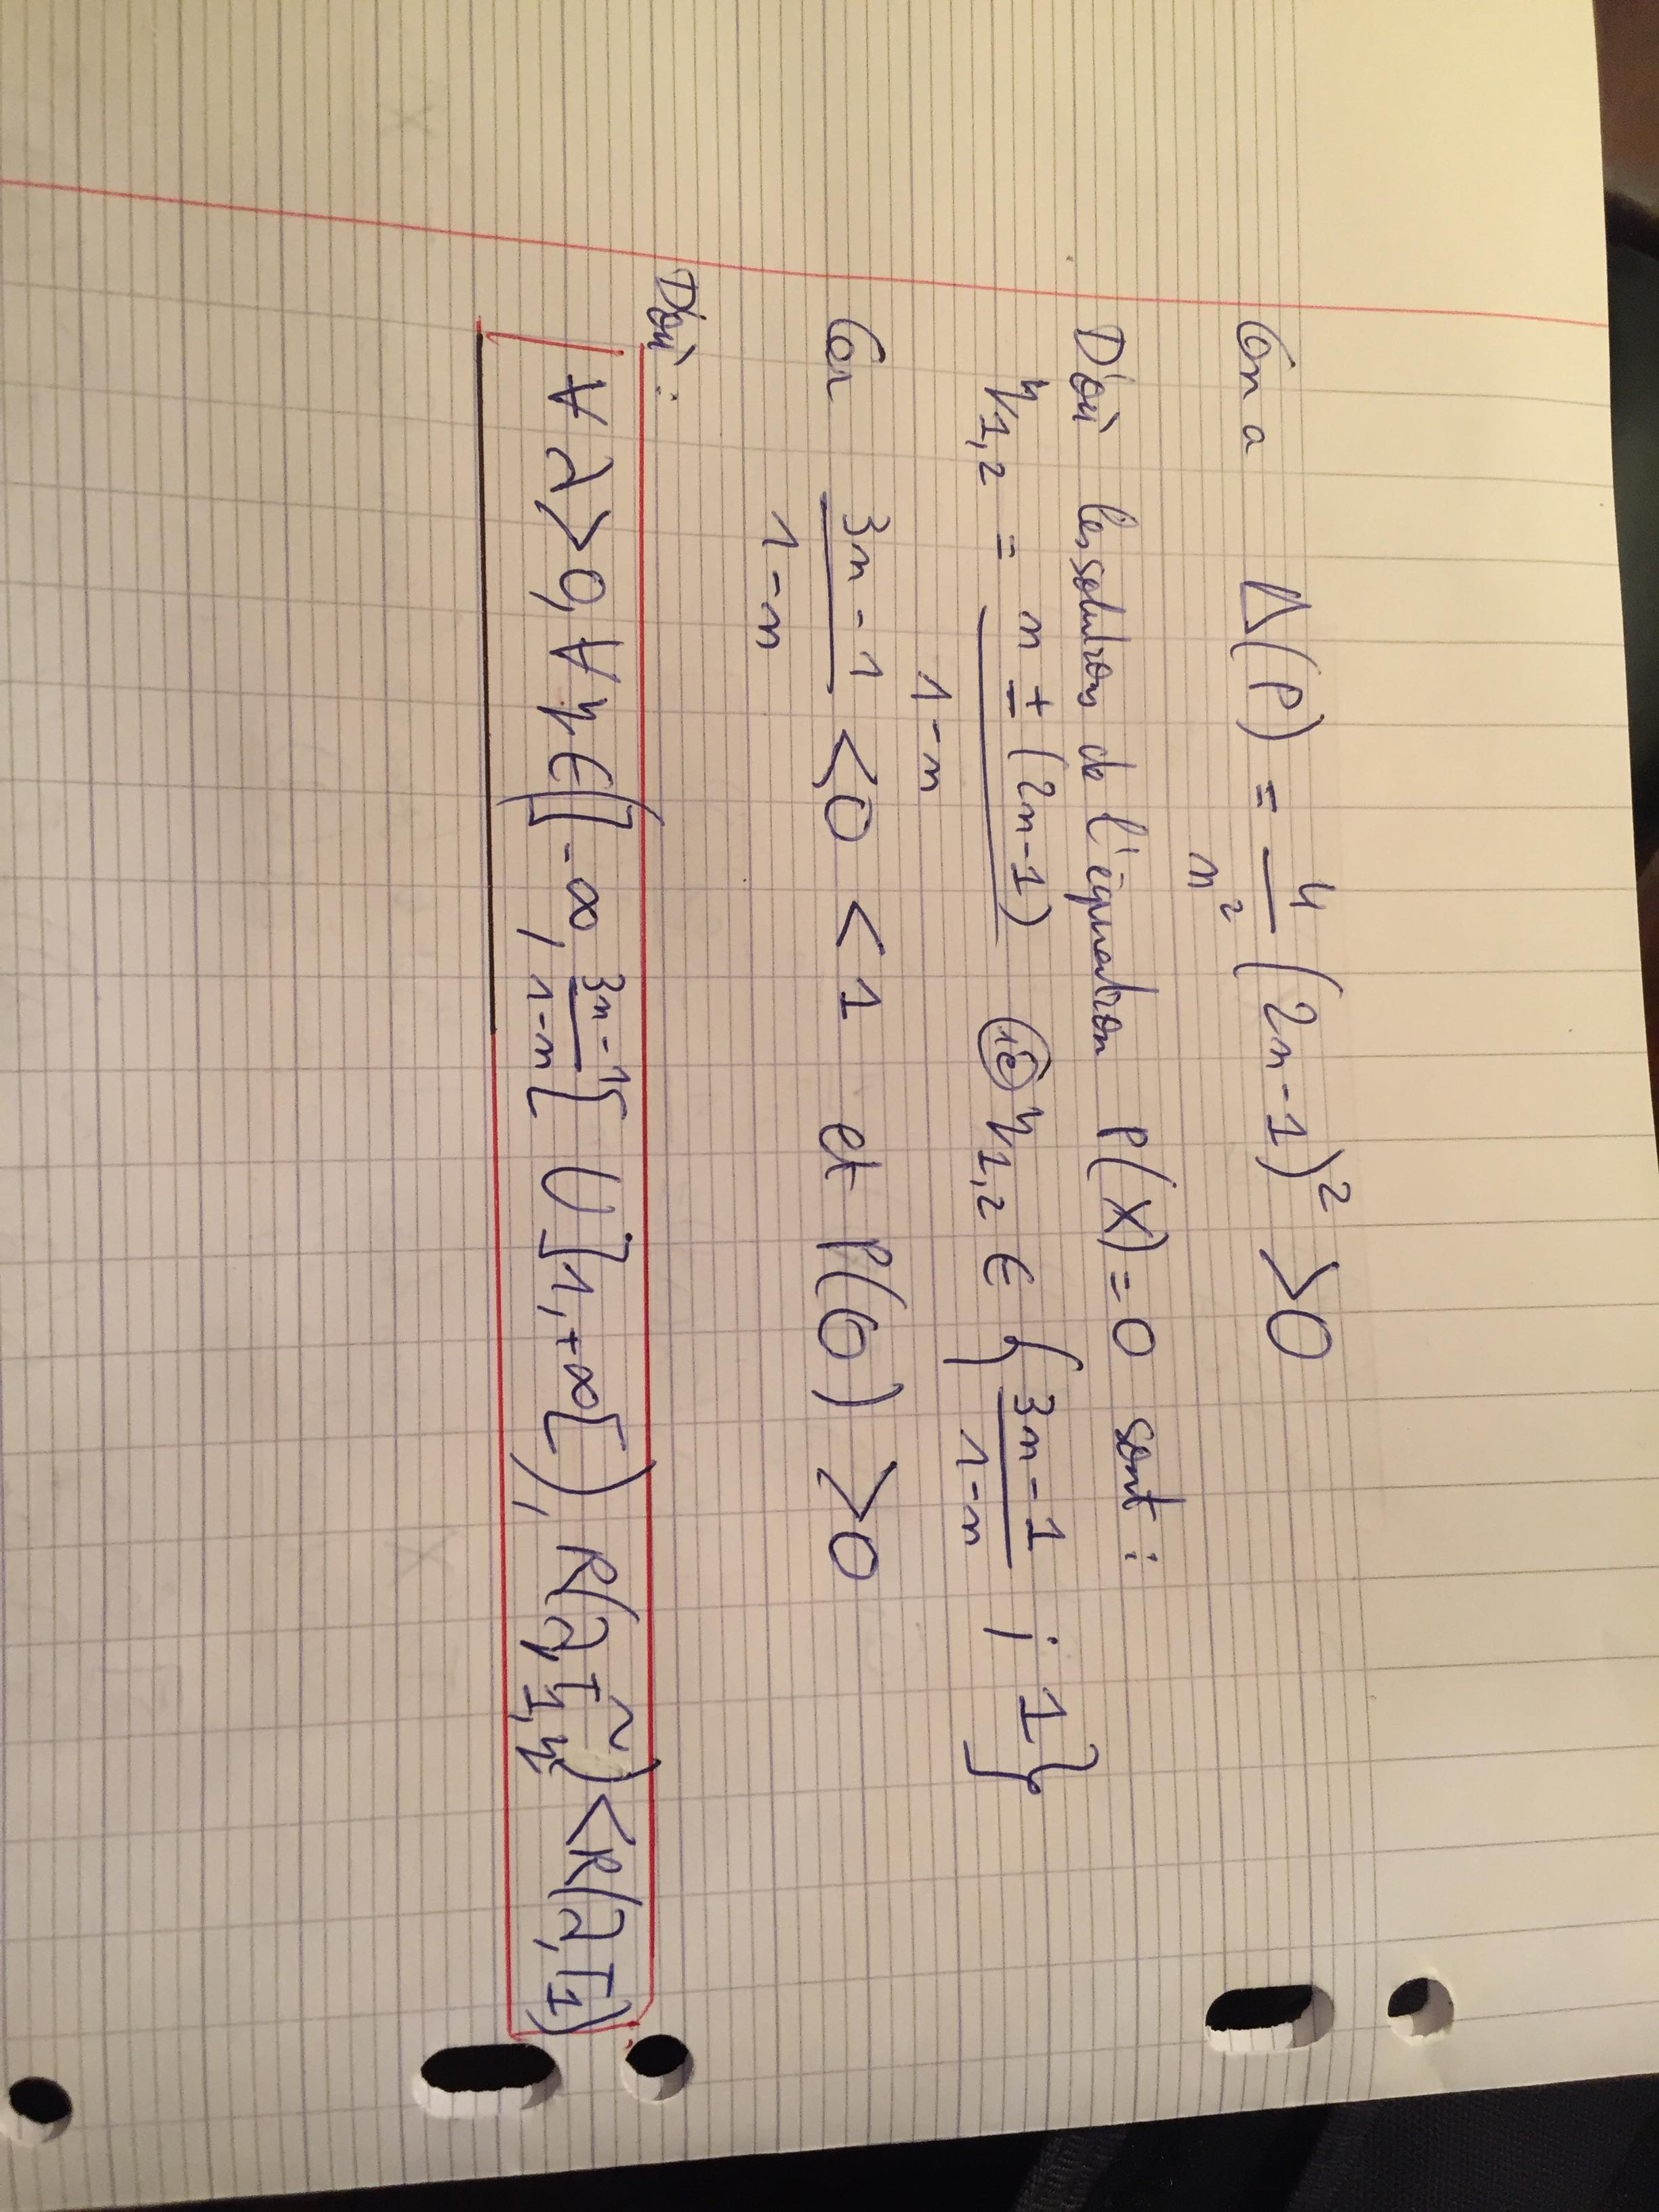

# Exercice 3 (Test sur le paramètre d’une loi):

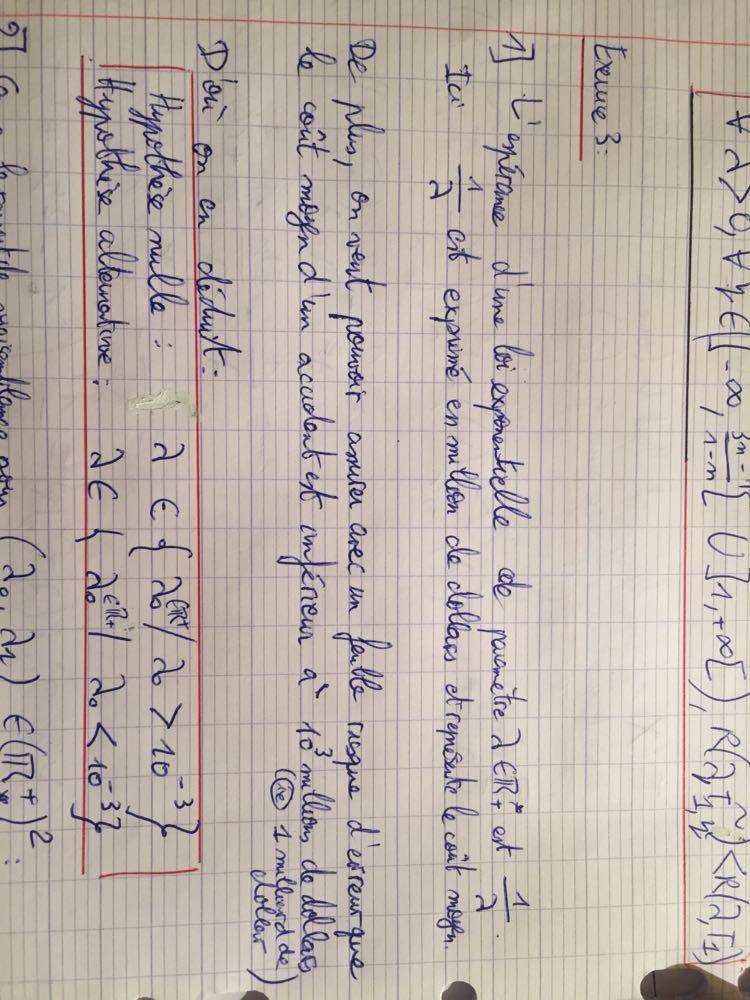

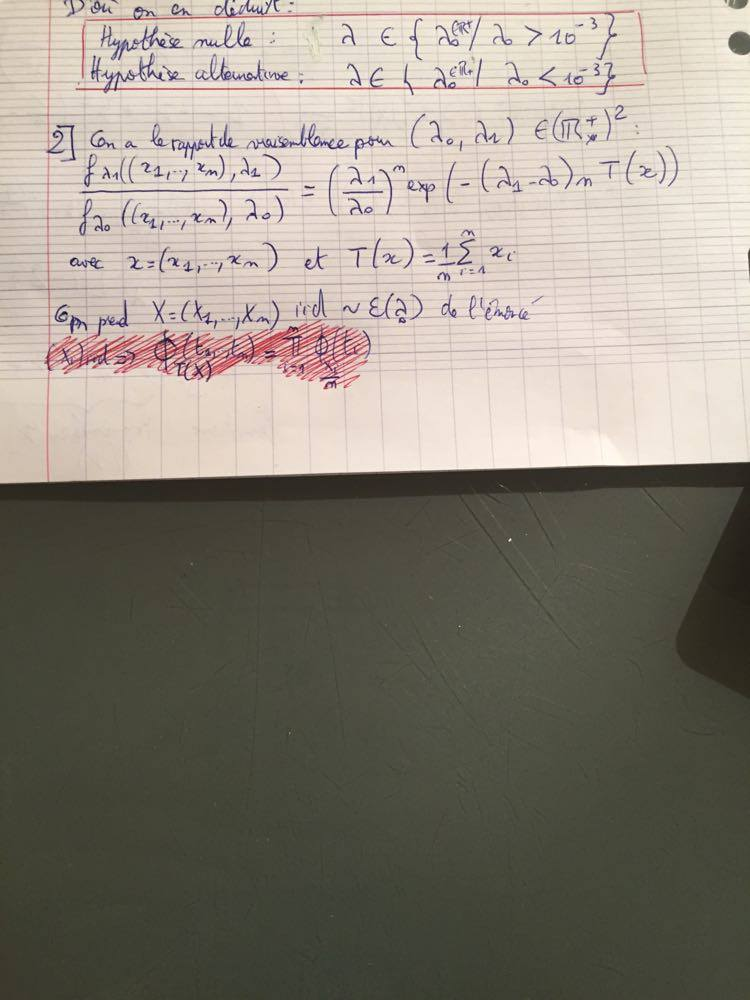
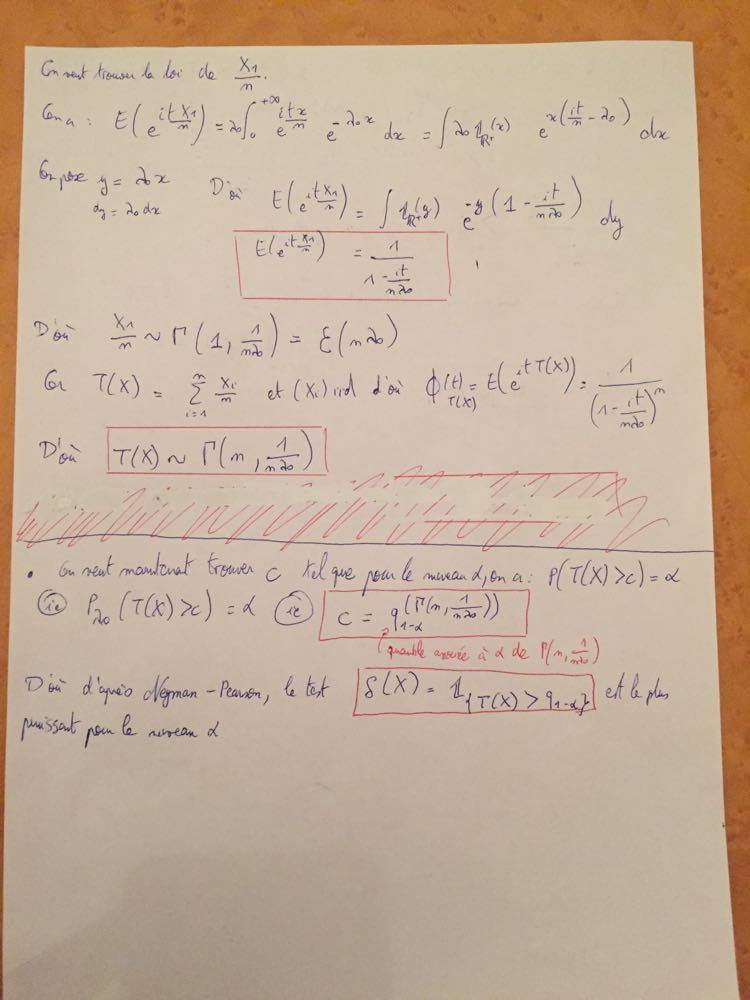

In [133]:
# Question 3 : Application du test pour l’échantillon considéré au niveau α = 0.05 .

sum = cost.sum()
beta = 0.95 # 1 - alpha 
n = 55
lambda0 = 10**(-3)
scale = 1/(n*lambda0)

quantile = np.quantile(stats.gamma.rvs(len(cost), scale = scale , size = 1000), beta)
print('Quantile =',quantile , 'Moyenne empirique =' , sum/len(cost))

# Etant donné que sum/len(cost) <=quantile, on accepte Ho

print("p valeur environ = ",stats.gamma.sf(quantile, n , scale = 1/(n*lambda0)))
# la p valeur vaut donc environ 0.06

Quantile = 1223.651152457334 Moyenne empirique = 726.3363636363637
p valeur environ =  0.0555624539719424


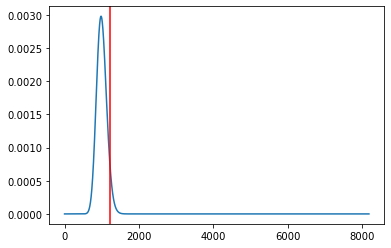

Quantile = 1231.6379811669049


In [76]:
# Question 4 : Tracer la densité de probabilité de T1 et indiquer la région du rejet au niveau α = 0.05.

lambda1 = 10**(-3)
n = 55
A = np.arange(0 , cost.max() )

def f(x) :
    return ((n*lambda1)**(n)/(mt.gamma(n))) * (x**(n-1)*np.exp(-n*lambda1*x))

B = [f(a) for a in A]
# T1 suit une loi gamma 

quantile = stats.gamma.ppf(0.95 , n , scale = 1/(n*lambda1))

# Tracé
plt.plot(A , B , label = "densité de T1")
plt.axvline(quantile , color = 'r')
plt.show()
print('Quantile =', quantile)

In [ ]:
# Question 6 : 

# Quantile de la loi normale centrée réduite  :

quantile = stats.norm.ppf(0.95,0,1)
print("Quantile de la loi normale centrée réduite =", quantile)

# Valeur de Z = T1(X) centrée réduite en prenant les valeurs du sujet: 

print( "Z en prenant les valeurs de l'énoncé =" ,(lambda1/n * sum - 1) * n**(1/2))



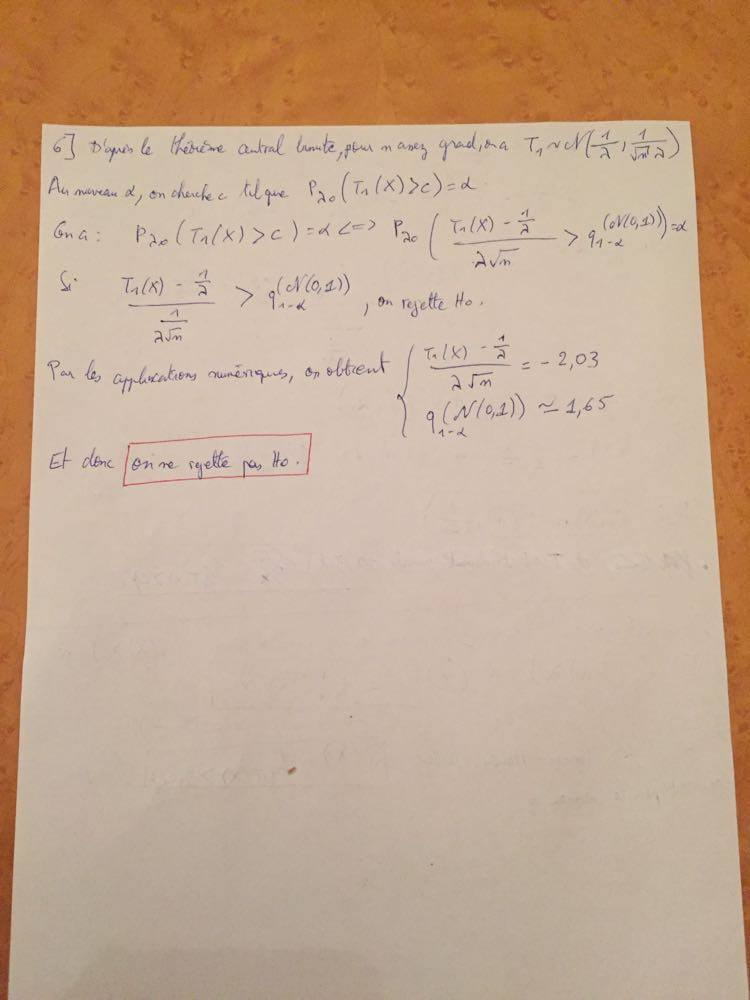